# COMPSCI 371D Homework 9

In [3]:
import numpy as np
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Measures of Impurity

### Problem 1.1

In [4]:
def error_rate(p):
    return 1 - np.amax(p)

def gini_index(p):
    out = 1
    for el in p:
        out -= el**2
    return out

print(gini_index([1,2,3]))

-13


### Problem 1.2 (Exam-Style)

### Problem 1.3 (Partially Exam-Style)

## Part 2: Thinking Recursively

In [5]:
import pickle

with open('small_set.pickle', 'rb') as file:
    small_set = pickle.load(file)
    
message = 'small_set has {} sample data points of dimension {}.'
print(message.format(*small_set['x'].shape))
print('The size of the label alphabet |Y| is {}'.format(len(small_set['Y'])))

small_set has 300 sample data points of dimension 2.
The size of the label alphabet |Y| is 3


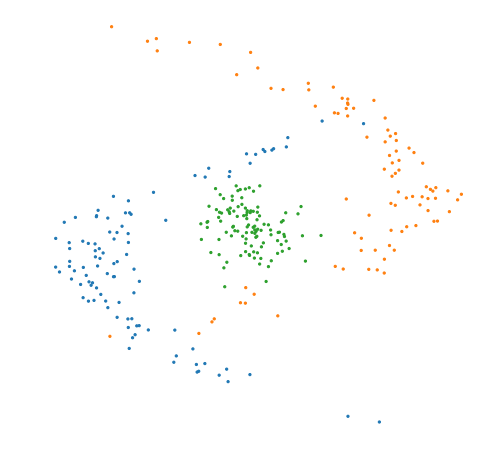

In [6]:
def draw_samples(samples):
    assert samples['x'].shape[1] == 2, 'Can only draw 2D samples'
    nc = len(np.unique(samples['y']))
    assert nc <= 10, 'Can only have up to ten classes'
    colormap = colors.ListedColormap(cm.tab10(range(nc)))
    plt.scatter(samples['x'][:, 0], samples['x'][:, 1], s=5, c=samples['y'], cmap=colormap)

plt.figure(figsize=(8, 8))
draw_samples(small_set)
plt.axis('off')
plt.show()

In [7]:
class Node:
    def __init__(self, j=None, t=None, p=None, left=None, right=None):
        self.j = j
        self.t = t
        self.p = p
        self.left = left
        self.right = right

    def __str__(self):
        for key, value in self.__dict__.items():
            if value is not None:
                return '{}: {}'.format(key, value)

In [8]:
with open('small_tree.pickle', 'rb') as file:
    small_tree = pickle.load(file)

### Problem 2.1

### Problem 2.2

### Problem 2.3

## Part 3: Decision Trees

In [9]:
with open('data.pickle', 'rb') as file:
    data = pickle.load(file)

### Problem 3.1

In [14]:
def distribution(samples):
    class_list = []
    for i in range(len(samples['y'])):
        class_list.append(samples['y'][i])
    K = len(set(class_list))
    p = np.zeros(K)
    n = 0
    for i in range(0, len(samples['x'])):
        p[samples['y'][i]] += 1
        n += 1
    return p/n

def impurity(samples):
    return gini_index(distribution(samples))

def ok_to_split(samples, depth, min_size=1, max_depth=30):
    return impurity(samples)>0 and len(samples['x']) > min_size and depth < max_depth

print (impurity(data['train']))

def find_split(samples):
    
    i_s = impurity(samples)
    delta_opt = -1
    d = samples['x'][1].shape[0]
    
    for i in range(0,d):
        newlist= []
        for j in range(samples['x'].shape[0]):
            newlist.append(samples['x'][j][i])
        finallist = []
        for k in range(0,len(newlist)-1):
            finallist.append((newlist[k]+newlist[k+1])/2.0)
        finallist = sorted(finallist)
        for item in finallist:  #This is the list of thresholds
            L = {}
            R = {}
            L["x"] = []
            L["y"] = []
            R["x"] = []
            R["y"] = []
            for h in range(0,samples['x'].shape[0]):
                if samples['x'][h][i] <= item:
                    L["x"].append((samples['x'][h]).tolist())
                    L["y"].append((samples['y'][h]).tolist())
                else:
                    R["x"].append((samples['x'][h]).tolist())
                    R["y"].append((samples['y'][h]).tolist())
            
            delta = i_s - (len(L['x']))/float(len(samples['x']))*impurity(L) - (len(R['x']))/float(len(samples['x']))*impurity(R)
            if delta > delta_opt:
                [delta_opt, L_opt, R_opt, d_opt, t_opt] = [delta, L, R, i, item]
                                                                                         
    return [delta_opt, L_opt, R_opt, d_opt, t_opt]
                    
    
# print (find_split(data['train']))

def split(x, tau):
    if tau.j <= tau.t:
        return tau.left
    else:
        return tau.right
    
def predict(x, tau, summary=np.argmax):
    if is_leaf(tau):
        return summary(tau.p) 
    else:
        return predict(x, split(x, tau), summary)
    
def train_tree(samples, depth=0):
    if ok_to_split(samples, depth, min_size=1, max_depth=30):
        [delta, L, R, tau.j, tau.t] = find_split(samples)
        tau.L = trainTree(L, depth + 1)
        tau.R = trainTree(R, depth + 1)
    else:
        tau.p = distribution(samples)
    
    return tau


[0.49466667 0.50533333]
0.49994311111111117


### Problem 3.2 (Exam-Style)